In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [72]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [75]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

In [ ]:
df['Geography'].value_counts()

In [ ]:
df['Gender'].value_counts()

In [79]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

In [81]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [82]:

X = df.drop(columns=['Exited'])
y = df['Exited'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
X_train.shape

(8000, 11)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.5195 - val_accuracy: 0.7969 - val_loss: 0.4986
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.5024 - val_accuracy: 0.7969 - val_loss: 0.4959
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4859 - val_accuracy: 0.7969 - val_loss: 0.4957
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 0.5018 - val_accuracy: 0.7969 - val_loss: 0.4950
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7917 - loss: 0.5034 - val_accuracy: 0.7969 - val_loss: 0.4946
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7966 - loss: 0.4985 - val_accuracy: 0.7969 - val_loss: 0.4942
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7977 - loss: 0.4973 - val_accuracy: 0.7969 - val_loss: 0.4948
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7966 - loss: 0.4975 - val_accu

In [90]:
model.layers[1].get_weights()

[array([[-0.30373943, -0.01280436,  0.14855167, -0.07742479,  0.0234577 ,
         -0.04898413,  0.09076428,  0.00703196, -0.21633115, -0.12884445,
          0.01802609],
        [ 1.1779352 ,  0.66168267, -0.95279   , -0.49693578,  1.0355706 ,
         -1.519126  ,  0.2977983 ,  0.7110008 , -0.93529665,  0.29106733,
          0.7189718 ],
        [ 0.07974359,  0.19208531, -0.40475667,  0.27038544, -0.39830235,
          0.27788514,  0.30168068, -0.20460667, -0.13670841, -0.33640403,
          0.08914314],
        [ 0.18397413, -0.19228192,  0.06411877, -0.41820073,  0.04671357,
         -0.22778921,  0.01389692, -0.17111632,  0.11223488,  0.33136487,
         -0.10662351],
        [ 0.15791439,  0.47200844, -0.46799105,  0.33003068,  0.4020076 ,
         -0.16042398,  0.26975757, -0.38643333,  0.2645889 ,  0.1912282 ,
         -0.17714958],
        [-0.37884358,  0.25766972,  0.24970482,  0.29077277, -0.5475854 ,
          0.03103573,  0.24192561, -0.10045566,  0.00833257, -0.0789142

In [ ]:
y_log=model.predict(X_test_scaled)

In [92]:
y_pred=np.where(y_log>0.5,1,0)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

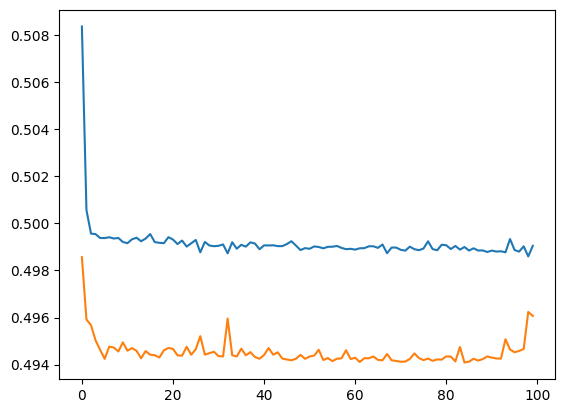

In [94]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

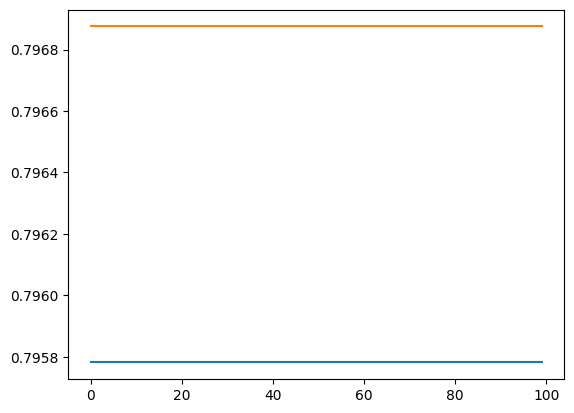

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])